In [32]:
# Import Library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
# Plot training history (optional visualization)
import matplotlib.pyplot as plt

In [6]:
file_path = "student_performance_integer.csv"
data = pd.read_csv(file_path)
# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

Dataset Preview:
   Study Hours  Sleep Hours  Play Hours  Pass/Fail
0            7            7           3          1
1            4            4           0          1
2            5            8           1          0
3            7            8           0          0
4            3            5           1          1


In [8]:
# Split data into input features (X) and target (y)
X = data[['Study Hours', 'Sleep Hours', 'Play Hours']].values
y = data['Pass/Fail'].values


In [10]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Scale the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [16]:
# Build the ANN model
model = Sequential([Dense(8, activation='relu', input_dim=3), Dense(1, activation='sigmoid')])


In [18]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])


In [20]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=8, verbose=1)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8254 - loss: 0.4985 - val_accuracy: 0.6000 - val_loss: 0.6737
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8321 - loss: 0.4522 - val_accuracy: 0.6000 - val_loss: 0.6722
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7864 - loss: 0.5132 - val_accuracy: 0.5500 - val_loss: 0.6809
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8255 - loss: 0.5040 - val_accuracy: 0.6000 - val_loss: 0.6802
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7597 - loss: 0.5446 - val_accuracy: 0.6000 - val_loss: 0.6858
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7400 - loss: 0.5708 - val_accuracy: 0.5500 - val_loss: 0.6856
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7756 - loss: 0.5092 - val_accuracy: 0.6500 - val_loss: 0.6834
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8001 - loss: 0.5182 - val_accuracy: 0.6000 - v

In [23]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.5500 - loss: 0.7206

Test Loss: 0.720629096031189
Test Accuracy: 0.550000011920929


In [25]:
# Make predictions on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


In [30]:
# Display evaluation metrics
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[ 0  6]
 [ 3 11]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.65      0.79      0.71        14

    accuracy                           0.55        20
   macro avg       0.32      0.39      0.35        20
weighted avg       0.45      0.55      0.50        20



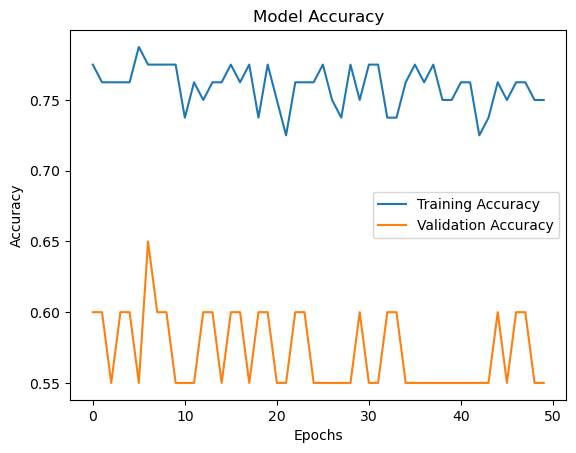

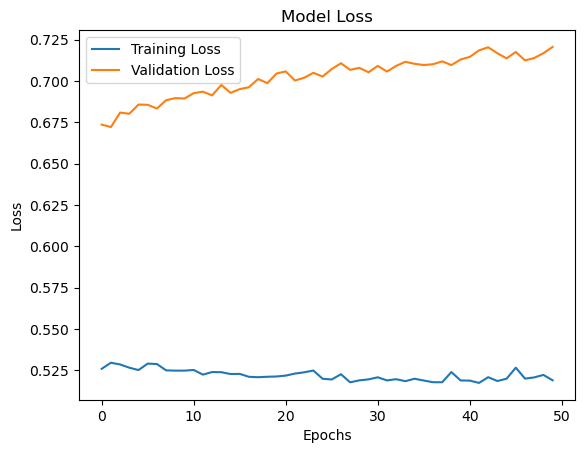

In [33]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()